# Insurance Claims- Fraud Detection

Problem Statement:
    
Business case:
    
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Target column

fraud_reported

# Importing Libraries

In [571]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special
import itertools
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.metrics
from pylab import rcParams
plt.style.use('seaborn')
%matplotlib inline



def warn(*args, **kwargs):
    pass
import warnings

warnings.filterwarnings("ignore")

from warnings import simplefilter

warnings.simplefilter("ignore")

Importing Data

In [572]:
aif = pd.read_csv('Automobile_insurance_fraud.csv')
aif.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


from the above chart we can see there are numerical as well as categorical data and our target column is a categorical variable so its a classification problem

In [573]:
aif.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


The above visualization statistical descriptions of the columns

In [574]:
aif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

There are no Nan values present in this dataset except one column that we will drop

In [575]:
aif.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

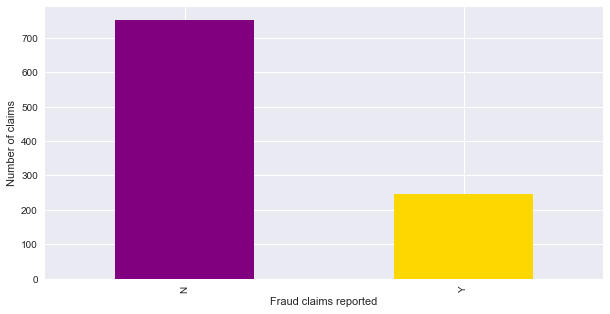

N    753
Y    247
Name: fraud_reported, dtype: int64

In [576]:

ax = pd.value_counts(aif['fraud_reported']).plot.bar(color=['purple', 'Gold'], figsize=(10,5))
ax.set_xlabel('Fraud claims reported')
ax.set_ylabel('Number of claims')
plt.show()
aif['fraud_reported'].value_counts()

this is an imbalanced sheet imbalanced dataset. There are more non-fraudulent cases than fraudulent ones. We need to think about the class imbalance when using ML models

In [577]:

fig = px.bar(aif, x='incident_state', y='total_claim_amount', color='incident_state' )
fig.show()

aif['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

Most of the incidents happend in New York, South Carolina, and West Virginia claiming > 10M $

In [578]:
fig = px.bar(aif, x='incident_date', y='fraud_reported', color='incident_state' )
fig.show()

The above plotted is 2 months of insurance claims data

In [579]:
fig = px.histogram(aif, x='age', color='fraud_reported', histnorm='probability density')
fig.show()

Age doesnot seem to be a good indicator of fraud detection

In [580]:
fig = px.histogram(aif, x="total_claim_amount", color="fraud_reported", marginal="violin",hover_data=aif.columns)
fig.show()

The above relation shows the relation between total_claim_amount and fraud_reported columns  and seems to be a great indicator predicton 

In [581]:
labels = ['Male', 'Female']
fig = px.pie(aif, values=aif['insured_sex'].value_counts(), names=labels, title='Percentage Gender of male and female ')
fig.show()

The above visualization shows the percentage distribution of male and female persons who claimed insurance, where male distribution seems higher than female

In [582]:
fig = px.pie(aif, values=aif['incident_type'].value_counts(), names=aif['incident_type'].value_counts().keys(), title='Percentage of Incident Type',color=['purple', 'Gold','orange','red'] )
fig.show()

The above visualization shows the distribution of incident type among which multivehicle collusion claims are highest and parked car claims are lowest

In [583]:

fig = px.histogram(aif, x='auto_make',  color='fraud_reported')
fig.show()

The above visualization shows the number of fraud accident reported on vrious car brands

In [584]:
fig = px.histogram(aif, x='insured_education_level',  color='fraud_reported')
fig.show()


The above visualization shows the education level of insurance claimed people 

In [585]:
fig = px.histogram(aif, x='insured_hobbies',  color='fraud_reported')
fig.show()

Most of the claims by chess and cross-fit hobbyists are fraudulent. Insured hobbies is a very important predictive feature.

In [586]:
fig = px.histogram(aif, x='incident_severity',  color='fraud_reported')
fig.show()

Most fraudulent claims happen when a major damage happens. Therefore, incident_severity looks like a good feature.

In [587]:
fig = px.pie(aif, values=aif['incident_severity'].value_counts(), names=aif['incident_severity'].value_counts().keys(), title='Percentage distribution of Incident Severity')
fig.show()

The above visualization shows the percentage distribution of incident_severity

In [588]:

fig = px.histogram(aif, x='collision_type',  color='fraud_reported', histnorm='probability density')
fig.show()

There are missing values. One way to handel this is to consider it as another type.

In [589]:

fig = px.histogram(aif, x='insured_occupation',  color='fraud_reported', histnorm='probability density')
fig.show()

The insured occupation doesnt play that big role in prediction

In [590]:
print('Missing values : ',aif.isna().sum())

Missing values :  months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_d

In [591]:
aif.columns[(aif == '?').any()]
aif['property_damage'].replace(to_replace='?', value='NO', inplace=True)
aif['police_report_available'].replace(to_replace='?', value='NO', inplace=True)

In [592]:
aif['property_damage'].replace(to_replace='?', value='NO', inplace=True)
aif['police_report_available'].replace(to_replace='?', value='NO', inplace=True)

replacing ? with NO in property_damage and police_report_available column

In [593]:
aif.duplicated(subset=None, keep='first').sum()
coldrop = ["policy_number", "policy_bind_date", "insured_zip", "incident_location", "incident_date", "_c39"]
aif = aif.drop(columns = coldrop, axis=1)
aif.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Dropping "policy_number", "policy_bind_date", "insured_zip", "incident_location", "incident_date" and  "_c39" as they are not much helpful for prediction.

In [594]:
th = 0.97

corr_matrix = aif.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

redundent = [column for column in upper.columns if any(upper[column] >= threshold)]
print(f'Columns to drop with correlation > {th}: {redundent}')
aif.drop(columns=redundent, inplace=True)

Columns to drop with correlation > 0.97: ['vehicle_claim']


In [595]:
num_f = aif._get_numeric_data().columns
cat_f = list(set(aif.columns) - set(num_f))
cat_f.remove('fraud_reported')

In [596]:
cat_f

['insured_relationship',
 'collision_type',
 'incident_city',
 'policy_csl',
 'insured_occupation',
 'incident_type',
 'property_damage',
 'incident_severity',
 'police_report_available',
 'insured_hobbies',
 'incident_state',
 'authorities_contacted',
 'policy_state',
 'auto_model',
 'insured_education_level',
 'auto_make',
 'insured_sex']

In [597]:
aif[num_f].head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_year
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,2004
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,2007
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,2007
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,2014
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,2009


In [598]:

aif[cat_f].head()

,insured_relationship,collision_type,incident_city,policy_csl,insured_occupation,incident_type,property_damage,incident_severity,police_report_available,insured_hobbies,incident_state,authorities_contacted,policy_state,auto_model,insured_education_level,auto_make,insured_sex
0,husband,Side Collision,Columbus,250/500,craft-repair,Single Vehicle Collision,YES,Major Damage,YES,sleeping,SC,Police,OH,92x,MD,Saab,MALE
1,other-relative,?,Riverwood,250/500,machine-op-inspct,Vehicle Theft,NO,Minor Damage,NO,reading,VA,Police,IN,E400,MD,Mercedes,MALE
2,own-child,Rear Collision,Columbus,100/300,sales,Multi-vehicle Collision,NO,Minor Damage,NO,board-games,NY,Police,OH,RAM,PhD,Dodge,FEMALE
3,unmarried,Front Collision,Arlington,250/500,armed-forces,Single Vehicle Collision,NO,Major Damage,NO,board-games,OH,Police,IL,Tahoe,PhD,Chevrolet,FEMALE
4,unmarried,?,Arlington,500/1000,sales,Vehicle Theft,NO,Minor Damage,NO,board-games,NY,None,IL,RSX,Associate,Accura,MALE


# Splitting data for ML

In [599]:
y = aif["fraud_reported"].map({"N":0, "Y":1})
x = aif.drop("fraud_reported", axis=1)

In [600]:
preprocessor = ColumnTransformer([("numerical", "passthrough", num_f), 
                                  ("categorical", OneHotEncoder(sparse=False, handle_unknown="ignore"),
                                   cat_f)])

Creating Pipeline

In [601]:
lr_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42))])


dt_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", DecisionTreeClassifier(class_weight="balanced"))])

lda_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", LinearDiscriminantAnalysis())])


rf_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1))])




In [602]:
def plot_eval(testY, predY, auc):  
    fpr, tpr, thresh = sklearn.metrics.roc_curve(testY, predY[:,1])
    
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()
    
    precision_rt, recall_rt, threshold_rt = sklearn.metrics.precision_recall_curve(testY, predY[:,1])
    plt.plot(recall_rt, precision_rt, linewidth=5, label='Precision-Recall curve')
    plt.title('Recall vs Precision')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
def process(model, X, y, grid_params, plot_eval_curves = False):
   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=555)
    
    gs = GridSearchCV(model, grid_params, 
                  n_jobs=-1, cv=5, scoring="roc_auc")

    gs.fit(X_train, y_train)

    model.set_params(**gs.best_params_)
    
    model.fit(X_train, y_train)
    
    # Predict probabilities and labels
    probs = model.predict_proba(X_test)
    preds = model.predict(X_test)
    
    # Calculate ROC AUC
    auc = sklearn.metrics.roc_auc_score(y_test, probs[:, 1])
    # get the confusion matrix
    cnf_matrix = sklearn.metrics.confusion_matrix(y_test, preds)    
    # Plot ROC curve
    if plot_eval_curves:
        plot_eval(y_test, probs, auc)
    else: 
        print('Best Parameters:', gs.best_params_)
        print('Best Score:', gs.best_score_)
        print(f'ROC AUC: {round(auc, 4)}')
        print(f'Confusion Matrix:\n {cnf_matrix}')
        # compute the other evaluation metrices 
        for metric in [sklearn.metrics.precision_score, sklearn.metrics.recall_score, sklearn.metrics.f1_score]:
            print(f'{metric.__name__}: {round(metric(y_test, preds), 4)}')

        # Average performance using 5 x cross-validation    
        score = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
        print('Cross-validation AUC score: ', score.mean()) 
    return model, cnf_matrix

creating function for hypertuning and splitting data for fitting

In [603]:
model_grid_params = {'lr_model': {"model__C": [1, 1.3, 1.5]}, 'dt_model': {"model__max_depth": [3, 5, 7], "model__min_samples_split": [2, 5]}, 
              'rf_model': {"model__max_depth": [20, 10, 15],"model__min_samples_split": [5, 10]}, 'lda_model': {}, 
               'xgb_model':{"model__max_depth": [5, 10], "model__min_child_weight": [5, 10]}}
models = [lr_model, dt_model, rf_model, lda_model]
model_keys = [('lr_model', 'Logistic Regression'),
              ('dt_model', 'Decision Tree'),
              ('rf_model', 'Random Forest'),
              ('lda_model', 'Linear Discriminant Analysis')
              ]
with warnings.catch_warnings():

    warnings.filterwarnings("ignore")
    
final_model, cnf_matrix = {}, {}
for idx, model in enumerate(models):
    print(45*'_', '\n{}'.format(model_keys[idx][1]))
    model, cnf = process(model, x, y, model_grid_params[model_keys[idx][0]])
    final_model[model_keys[idx][0]] = model
    cnf_matrix[model_keys[idx][0]] = cnf
    

_____________________________________________ 
Logistic Regression
Best Parameters: {'model__C': 1.5}
Best Score: 0.5932983947870312
ROC AUC: 0.5655
Confusion Matrix:
 [[76 75]
 [23 26]]
precision_score: 0.2574
recall_score: 0.5306
f1_score: 0.3467
Cross-validation AUC score:  0.5932762589539127
_____________________________________________ 
Decision Tree
Best Parameters: {'model__max_depth': 3, 'model__min_samples_split': 2}
Best Score: 0.8338993960584871
ROC AUC: 0.8241
Confusion Matrix:
 [[126  25]
 [  9  40]]
precision_score: 0.6154
recall_score: 0.8163
f1_score: 0.7018
Cross-validation AUC score:  0.8525278569176015
_____________________________________________ 
Random Forest
Best Parameters: {'model__max_depth': 20, 'model__min_samples_split': 5}
Best Score: 0.8584102034329307
ROC AUC: 0.8074
Confusion Matrix:
 [[135  16]
 [ 23  26]]
precision_score: 0.619
recall_score: 0.5306
f1_score: 0.5714
Cross-validation AUC score:  0.8491084705140335
_______________________________________

Initiating models and running for loop fot testing various models 

In [604]:
def plotty(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.show()
    plotty(cnf_matrix['lda_model'], target_names=['real', 'fraud'], normalize=False)

Plotting confucion matrix for Lda model

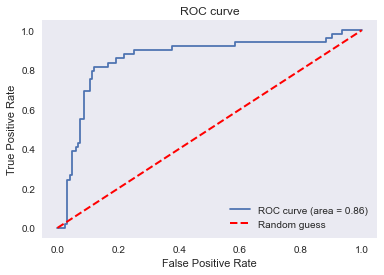

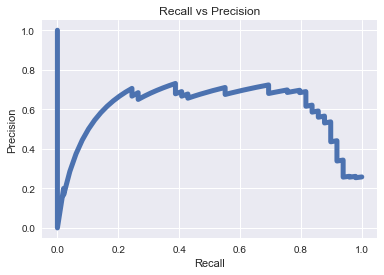

In [605]:
# ROC curve LDA 
model, cnf = process(lda_model, x, y, model_grid_params['lda_model'], plot_eval_curves=True)

Plotting ROC curve for Lda model

# Saving model

In [606]:
import joblib
joblib.dump(lda_model,"Insurance.obj")

['Insurance.obj']